In [44]:
import functions
from functions import *
import matplotlib.pyplot as plt

# Dimensions from 1 to 3 (higher possible)
D = 1
# Number of lattice points  100
N = 100
L_over_r = 3

epsilon = L_over_r/N
mu = 10
epsilon_2 = epsilon**2
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon_2 = epsilon_2

# Initialize plane wave with according dimensions
psi =  generate_gauss(np.array((0.1,)), np.array((10,)), 10)

df = time_evolution(psi, integrator_euler, 0.0001, 0.001)
df.head()


/Users/gyulaiemese/Desktop/Daniel/comp_phys/functions.py:333: ComplexWarning: Casting complex values to real discards the imaginary part
  gaussian[index] =     entry


,norm,exp_Etot,exp_Ekin,exp_Epot,exp_pos,indet_pos,time,function
0,3.144936,20.284864,17.042317,3.242548,[[188.69615667559663]],[[-24276.60779441929]],0.0000,[(4.01570901661723e-157+4.348230102759796e-69j...
0,3.144939,20.284941,17.042391,3.242551,[[188.6963409926443]],[[-24276.66619972974]],0.0001,[(-5.324848653579996e-68+8.696460205519592e-69...
0,3.144942,20.285019,17.042465,3.242554,[[188.69652544635395]],[[-24276.724569944083]],0.0002,[(-1.5974545960739986e-67-5.210025516463852e-6...
0,3.144945,20.285096,17.042539,3.242556,[[188.69671003672593]],[[-24276.78290506174]],0.0003,[(4.063177930925355e-66-2.118796047407619e-66j...
0,3.144948,20.285173,17.042614,3.242559,[[188.69689476376058]],[[-24276.8412050821]],0.0004,[(2.1380859385342775e-65+2.4105460331082087e-6...


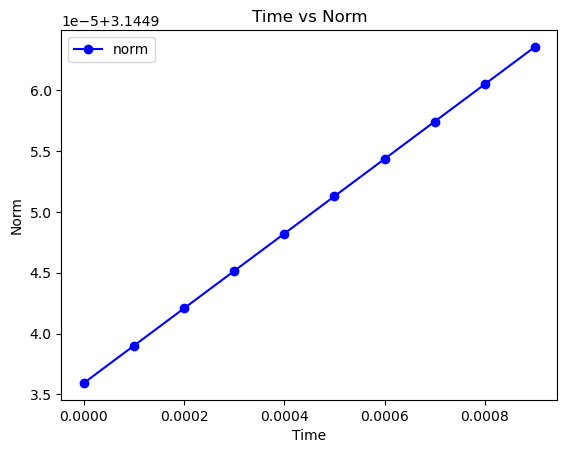

In [45]:
df.plot(x='time', y='norm', kind='line', marker='o', linestyle='-', color='b')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Norm')
plt.title('Time vs Norm')

# Display the plot
plt.show()

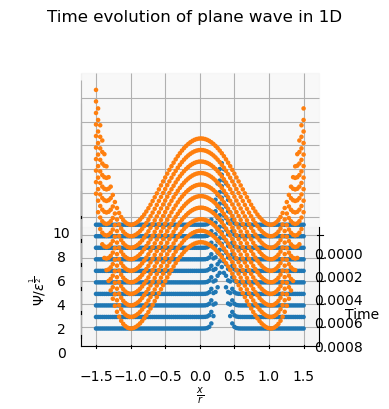

In [46]:
from mpl_toolkits.mplot3d import Axes3D
length = len(df)
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_axis = np.linspace(-N/2,N/2,N)
x_axis= x_axis*epsilon


x = np.zeros((N,)*D)
pot_psi = np.ones_like(x)
potential = potential_function(pot_psi)

# Scatter plot
ax.view_init(elev=30, azim=-0)
ax.set_proj_type('ortho')
for index, row in df.iterrows():
    time = row['time']
    function = row['function']
    ax.scatter(time, x_axis, function.real/epsilon**(0.5), marker = '.',color = 'C0', alpha = 1)
    ax.scatter(time, x_axis, potential.real/epsilon**(0.5), marker = '.',color = 'C1', alpha = 1)

# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel(r"$\frac{x}{r}$")
ax.set_zlabel(r"$\Psi/ \varepsilon^{\frac{1}{2}}$")
ax.set_title('Time evolution of plane wave in 1D')

# Display the plot
plt.show()
